# Telco Customer Churn Analysis and Prediction

## Objective
Analyze the Telco Customer Churn dataset to predict Churners using supervised (Logistic Regression, Decision Tree, Random Forest, SVM) methods. Prepare results for visualization in Power BI.

## Dataset
- **Source**: [Kaggle Telco Customer Churn Dataset] (http://www.kaggle.com/datasets/blastchar/telco-customer-churn)
- **Features**: Customer demographics (gender, partner, dependent, senior cytizen status), services (internet, phone, streaming, support), contract details (month to month, one year, two year), payment methods, monthly charges, total charges, tenure.
- **Target**: Churn (Yes/No)

## Data Preprocessing
1. **Load Data**: Import csv dataset from local directory.
2. **Handle Missing Values**: Drop row missing values (e.g., `TotalCharges` have missing entries).
3. **Encode Categorical Variables**: Convert categorical features to numerical using one-hot encoding.
4. **Numrical Feature Scaling**: Standardize numerical features (e.g., MonthlyCharges, Tenure) for algorithms like SVM and K-Means.
5. **Train-Test Split**: Split data into 80% training and 20% testing sets.

## Models and Algorithms
1. **Logistic Regression**: Binary classification to predict churn probability.
2. **Decision Tree Classifier**: Identify key decision rules for churn.
3. **Random Forest Classifier**: Ensemble model for robust churn prediction and feature importance.
4. **SVM**: Classify churn with a hyperplane, using a kernel for non-linear data.

## Evaluation Metrics
- accuracy, precision, recall, f1_score, roc_auc, confusion_matrix, roc_curve

## Visualization Plan for Power BI
- **Classification Results**: Bar charts for model performance (Accuracy, F1-Score), ROC curves.
- **Feature Importance**: Bar plots from Random Forest.

## Tools
- **Python**: Pandas, Numpy, Scikit-learn, pickle and streamlit for deployment, Matplotlib and Seaborn for initial plots.
- **Power BI**: For interactive visualizations.

---

## Analysis and Modeling
### 1. Data Preprocessing
- Load dataset and check for missing values.
- Convert categorical variables to dummy variables.
- Scale numerical features.
- Split data into train and test set.

### 2. Model Implementation
- **Logistic Regression**: Fit and predict churn.
- **Decision Tree**: Tune max_depth to avoid overfitting.
- **Random Forest**: Tune n_estimators and max_depth.
- **SVM**: Experiment with linear.

We have used `class weigth` to balance dataset.

### 3. Evaluation
- Compare classification models using metrics and its cost.

### 4. Deployment
- Create pipeline and export it by pickle
- Create app.py by using streamlit
### 5. Visualization
- Export results (predictions, feature importance) to CSV for Power BI.
- Create dashboards in Power BI to visualize model performance, customer segments, and service associations.


### 1. Data preprocessing

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

#Load dataset
main_data = pd.read_csv("./Data/Telco-Customer-Churn.csv")

#Date processig
#Handle missing value
main_data['TotalCharges'] = pd.to_numeric(main_data['TotalCharges'], errors = 'coerce')
main_data.dropna(subset = ['TotalCharges'], inplace = True)

#Encoded categorical features for classification models
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod']
df_encoded = pd.get_dummies(main_data, columns = categorical_cols, drop_first=True)
df_encoded['Churn'] = main_data['Churn'].map({'Yes': 1, 'No': 0})

#Separate feature and target
X = df_encoded.drop(['customerID', 'Churn', 'State'], axis = 1)
y = df_encoded['Churn']

#Scale numerical features
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
X[num_cols] = scaler.fit_transform(X[num_cols])

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 2. Modelisation &Validation & Evaluation

- **Hypermarameter Tuning**
- **Evaluation with test set**
- **Metrics interpretation**

In [3]:
param_grids = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
        'search': 'grid',
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'solver': ['liblinear']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(class_weight='balanced', random_state=42),
        'search': 'grid',
        'params': {
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 10, 50, 100]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(class_weight='balanced', random_state=42),
        'search': 'random',
        'params': {
            'n_estimators': [100, 300, 500],
            'max_depth': [10, 20, 30, None],
            'min_samples_split': [2, 10, 50]
        }
    },
    'SVM': {
        'model': LinearSVC(class_weight= 'balanced', max_iter=10000, random_state = 42),
        'search': 'grid',
        'params': {
            'C': [0.1, 1, 10]
            
        }
    }
}

best_models = {}

for name, config in param_grids.items():
    print(f"Model : {name.upper()}")

    if config['search'] == 'grid':
        
        search = GridSearchCV(config['model'], config['params'], cv=5, scoring='f1')
    else:
        search = RandomizedSearchCV(config['model'], config['params'], cv=5, n_iter=20, random_state=42, scoring='f1')

    search.fit(X_train, y_train)
    best_models[name] = search
    print(f"Best Cross-Validation score: {search.best_score_:.4f}")
    print(f"Best params : {search.best_params_}")
    print("-" * 50)

Model : LOGISTIC REGRESSION
Best Cross-Validation score: 0.6331
Best params : {'C': 0.1, 'solver': 'liblinear'}
--------------------------------------------------
Model : DECISION TREE
Best Cross-Validation score: 0.6120
Best params : {'max_depth': 5, 'min_samples_split': 100}
--------------------------------------------------
Model : RANDOM FOREST
Best Cross-Validation score: 0.6437
Best params : {'n_estimators': 500, 'min_samples_split': 10, 'max_depth': 10}
--------------------------------------------------
Model : SVM
Best Cross-Validation score: 0.6302
Best params : {'C': 0.1}
--------------------------------------------------


- **Extract metrics, display and save its for powerBI visualization.**

In [4]:
results = []
ROC_res = []
cm_dfs = {}
combined_data = []


churn_prediction = pd.DataFrame({'customerID': main_data.loc[X_test.index, 'customerID']})
#Extract metrics
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else [0] * len(y_test)
    churn_prediction[f'{name}_predict'] = y_pred
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision' : precision_score(y_test, y_pred),
        'Recall' : recall_score(y_test, y_pred),
        'F1-score' : f1_score(y_test, y_pred),
        'ROC-AUC' : roc_auc_score(y_test, y_pred),
        'Confusion- matrix' : confusion_matrix(y_test, y_pred)
    })
    
    #Extract ROC cuve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    df = pd.DataFrame({"FPR": fpr,"TPR" : tpr, "Model": name})
    ROC_res.append(df)
    
    #Extract Confusion Matrix for PowerBI visualization
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
    cm_dfs[name] = cm_df
    cm_df_long = cm_df.stack().reset_index()
    cm_df_long.columns = ['Actual', 'Predicted', 'Value']
    cm_df_long['Model'] = name
    combined_data.append(cm_df_long)
    
#Convert result to DataFrame and save as csv
results_df = pd.DataFrame(results)
float_cols = results_df.select_dtypes(include=['float64']).columns
results_df[float_cols] = results_df[float_cols].round(3)
results_df[:-1].to_csv("metric_bestModel.csv", index= True, float_format='%.3f')

combined_cm_df = pd.concat(combined_data, ignore_index=True)
combined_cm_df.to_csv("Confusion_Matrix.csv", index =False)

roc_data = pd.concat(ROC_res)
roc_data.to_csv("ROC_Result.csv", index= True, float_format='%.3f')
churn_prediction.iloc[:, :-1].to_csv("ML_prediction.csv", index= True)

#Display result
print("\nEVALUATION  WITH TEST SET")
print("----------------------------\n")
print(results_df)


EVALUATION  WITH TEST SET
----------------------------

                 Model  Accuracy  Precision  Recall  F1-score  ROC-AUC  \
0  Logistic Regression     0.736      0.503   0.789     0.614    0.753   
1        Decision Tree     0.692      0.457   0.842     0.593    0.740   
2        Random Forest     0.754      0.528   0.711     0.606    0.740   
3                  SVM     0.725      0.489   0.802     0.608    0.750   

          Confusion- matrix  
0   [[741, 292], [79, 295]]  
1   [[659, 374], [59, 315]]  
2  [[795, 238], [108, 266]]  
3   [[720, 313], [74, 300]]  


**Classification Results interpretation:**
--
Output above presents classification results for four models (Logistic Regression, Decision Tree, Random Forest and SVM)- evaluated on Accuracy, Precision, Recall, F1-score, ROC-AUC, with their Confusion Matrices. With churners making up **`~26.58%`** of customers, the dataset is imbalanced, which impacts the metrics.

## Logistic Regression

After hyperparameter tuning, Logistic Regression achieved an accuracy of **73.6%**, a precision of **50.3%**, and a recall of **78.9%**. Its F1-score, which balances precision and recall, is the highest among all models at **61.4%**, and the ROC-AUC score is also the best at **75.3%**.

The confusion matrix for Logistic Regression  means:
- **741** non-churners were correctly classified (True Negatives),
- **292** non-churners were incorrectly classified as churners (False Positives),
- **79** churners were missed (False Negatives),
- **295** churners were correctly detected (True Positives).

>Logistic Regression performs very well in detecting churners with high recall and excellent F1-score. Although it generates some false positives, it offers a strong balance between catching actual churners and avoiding too many incorrect predictions. It is also fast and interpretable, making it suitable for real-world deployment.

---

## Decision Tree

The Decision Tree model obtained an accuracy of **69.2%**, a precision of **45.7%**, and the **highest recall** of all models at **84.2%**. Its F1-score was **59.3%**, and the ROC-AUC score was **74.0%**.

The confusion matrix indicates:
- **659** non-churners correctly predicted,
- **374** false alarms (non-churners predicted as churners),
- **59** missed churners,
- **315** correctly identified churners.

>The Decision Tree is excellent when the goal is to detect as many churners as possible. It has the best recall, which means very few churners are missed. However, it also generates the most false positives, which may lead to unnecessary customer retention efforts and costs. This model is ideal when the cost of missing a churner is higher than acting on a false alert.

---

## Random Forest

Random Forest achieved the **highest accuracy** at **75.5%** and the **best precision** at **52.8%**, with a recall of **70.9%**, an F1-score of **60.6%**, and a ROC-AUC score of **74.0%**.

Its confusion matrix means:
- **795** correct non-churner predictions,
- **238** false positives,
- **108** missed churners,
- **266** churners correctly predicted.

>Random Forest offers the most accurate predictions overall and is best at reducing false alarms, thanks to its high precision. However, it misses more churners than Logistic Regression or Decision Tree. This model is ideal for situations where false positives are expensive and must be minimized.

---

## Support Vector Machine

The SVM model had an accuracy of **72.5%**, a precision of **48.9%**, a recall of **80.2%**, an F1-score of **60.8%**, and a ROC-AUC score of **75.0%**.

The confusion matrix which translates to:
- **720** correct non-churners,
- **313** false positives,
- **74** missed churners,
- **300** correctly predicted churners.

>SVM performs nearly as well as Logistic Regression, especially in terms of recall and F1-score. However, it takes significantly longer to train and is less interpretable. It's a strong model for detecting churners but may not be the most practical for large-scale use or real-time systems.

---

## Final Decision: Choosing the Best Model

| Criterion                                | Best Model                 |
|------------------------------------------|----------------------------|
| Best at detecting churners (Recall)      | Decision Tree           |
| Best at avoiding false positives         | Random Forest           |
| Best overall balance (F1 + ROC + Recall) | **Logistic Regression** |

---

> Based on all the evaluation metrics and confusion matrix analysis, **Logistic Regression** is the recommended model for predicting customer churn.

- It achieves the **highest F1-score** (61.4%) and **best ROC-AUC** (75.3%),
- It maintains a **strong recall** (78.9%) with acceptable precision,
- It is **fast, interpretable, and stable**, making it ideal for applications,
- It works well with **imbalanced data**, especially when paired with class weights and careful tuning.

In summary, Logistic Regression offers the best trade-off between identifying churners, minimizing false positives, and maintaining performance consistency across all metrics.


---
For the next step, we will make comparison of the three best models results.

- **Feature importance**

In [5]:
model_types = {
    'Logistic': 'Logistic Regression',
    'Random Forest': 'Random Forest',
    'Decision Tree': 'Decision Tree'
}

# Assign models in a loop
models = {}
for name, full_name in model_types.items():
    models[name] = best_models[full_name].best_estimator_


# Feature importance calculation in a loop
results = {}
for name, model in models.items():
    if name == 'Logistic':
        lr_importance = pd.Series(model.coef_[0], index=X_train.columns).abs().sort_values(ascending=False)
        results[name] = lr_importance / lr_importance.sum()
    else:
        results[name] = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

#Convert into dataframe for exportation
table_data = pd.DataFrame({
    'Logistic Regression': results['Logistic'],
    'Random Forest' : results['Random Forest'],
    'Decision Tree' : results['Decision Tree']
})

table_data[:10].to_csv("feature_importance.csv", index= True, float_format='%.3f')

print(table_data.head(10))

                                      Logistic Regression  Random Forest  \
Contract_One year                                0.084558       0.046046   
Contract_Two year                                0.139713       0.101231   
Dependents_Yes                                   0.027172       0.013145   
DeviceProtection_No internet service             0.010760       0.015467   
DeviceProtection_Yes                             0.008215       0.009753   
InternetService_Fiber optic                      0.072059       0.075496   
InternetService_No                               0.010760       0.014422   
MonthlyCharges                                   0.027589       0.098559   
MultipleLines_No phone service                   0.028639       0.003882   
MultipleLines_Yes                                0.018866       0.011856   

                                      Decision Tree  
Contract_One year                          0.266537  
Contract_Two year                          0.392068  
D

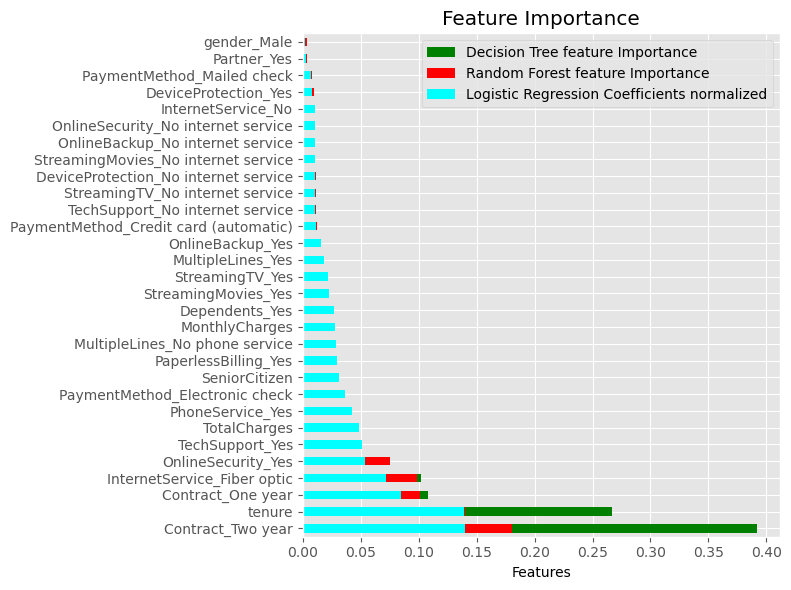

In [6]:
#Ploting feature importance
results['Decision Tree'].plot(kind='barh', figsize=(8, 6), color='green', label= 'Decision Tree feature Importance')
results['Random Forest'].plot(kind='barh', figsize=(8, 6), color = 'red', label ='Random Forest feature Importance')
results['Logistic'].plot(kind='barh', figsize=(8, 6), color = 'cyan',label= 'Logistic Regression Coefficients normalized')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.legend()
plt.tight_layout()
plt.show()

### Comment
The score values in  each column represente the importance the relative importance of each feature. They are based on how much each feature reduces impurity or variance in the data. 
To make comparison posibble with these three modeles, normalization for logistic regression is required.

**Top features:**

`Contract_Two year` show highest importance accross all modeles. `tenure` follow with moderate importance. And `OnlineSecurity_Yes`, `Contract_One year` and `InternetService_Fiber Optic` also have noticeable importance though lower.
Te highest importance of `Contract_Two year` accross all models, especially Decision tree, indicate that customers with two years contracts are a key factor in predicting churn. Moderate importance of `tenure` suggests that the lenght of customers tenure also influences churn, with long tenure, possibly correlate with lower churn rate.

**Low Importance:**

`gender_Male`, `PayementMethod_Mailed check`, and `StreaminMovies_No internet service` have near-zero importance, suggesting they have little influence on churn prediction.

**Normalized LR:**
Values are lower compared to tree-based modele, consistent with the normalization effect.

`Contract_Two year` and `tenure` indicate a stronger influence on the prédiction in all three.

### DEPLOYEMENT

- **PIPELINE FOR GENERATING APP**

In [10]:
import pickle
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


# Load the original dataset to identify columns (for production consistency)
main_dataset = pd.read_csv("./Data/Telco-Customer-Churn.csv")

#Convert String to numeric
cols_to_converts = ['TotalCharges', 'MonthlyCharges', 'tenure']
for cols in cols_to_converts:
    if not pd.api.types.is_numeric_dtype(main_dataset[cols]):
       main_dataset[cols] = pd.to_numeric(main_dataset[cols], errors = 'coerce')
# Define categorical and numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges'] 

#categorical_cols = [col for col in X_train.columns if col not in numerical_cols]
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod']
all_cols = numerical_cols + categorical_cols

# Define preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle potential new NaN values
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


model_types = {
    'Logistic': 'Logistic Regression',
    'Random Forest': 'Random Forest',
    'Decision Tree': 'Decision Tree'
}

#Prepare features and target
X = main_dataset[all_cols]
y = main_dataset['Churn'].map({'Yes': 1, 'No': 0})

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

best_model = {}
for name, full_name in model_types.items():
    best_model[name] = best_models[full_name].best_estimator_
    
    # Create the full pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', best_model[name])
    ])
    
    # Retrain the pipeline on the full training data
    pipeline.fit(X_train, y_train)

# Save the pipeline
    filename = f"./model_deployment/{name}_churn_prediction_pipeline.pkl"
    with open(filename, 'wb') as file:
        pickle.dump(pipeline, file)
    print(f"Pipeline saved as '{name}_churn_prediction_pipeline.pkl'")

Pipeline saved as 'Logistic_churn_prediction_pipeline.pkl'
Pipeline saved as 'Random Forest_churn_prediction_pipeline.pkl'
Pipeline saved as 'Decision Tree_churn_prediction_pipeline.pkl'


- **Testing pipeline**

In [16]:
def test_pipeline(pileline_file, model_type):
    with open(pileline_file, 'rb') as file:
        loaded_pipeline = pickle.load(file)
    #Test with a sample from X_test
    sample_data = X_test.iloc[:20].copy()
    sample_predictions = loaded_pipeline.predict(sample_data)
    print(f"\nModel: {model_type}")
    print('-'*30)
    print(f"Sample predictions: {sample_predictions}")

In [17]:
pkl_file = {
    'Logistic' : './model_deployment/Logistic_churn_prediction_pipeline.pkl',
    'Random Forest': './model_deployment/Random Forest_churn_prediction_pipeline.pkl',
    'Decision Tree': './model_deployment/Decision Tree_churn_prediction_pipeline.pkl'
}

for name, pkl in pkl_file.items():
    test_pipeline(pkl, name)


Model: Logistic
------------------------------
Sample predictions: [1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1]

Model: Random Forest
------------------------------
Sample predictions: [1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1]

Model: Decision Tree
------------------------------
Sample predictions: [1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1]


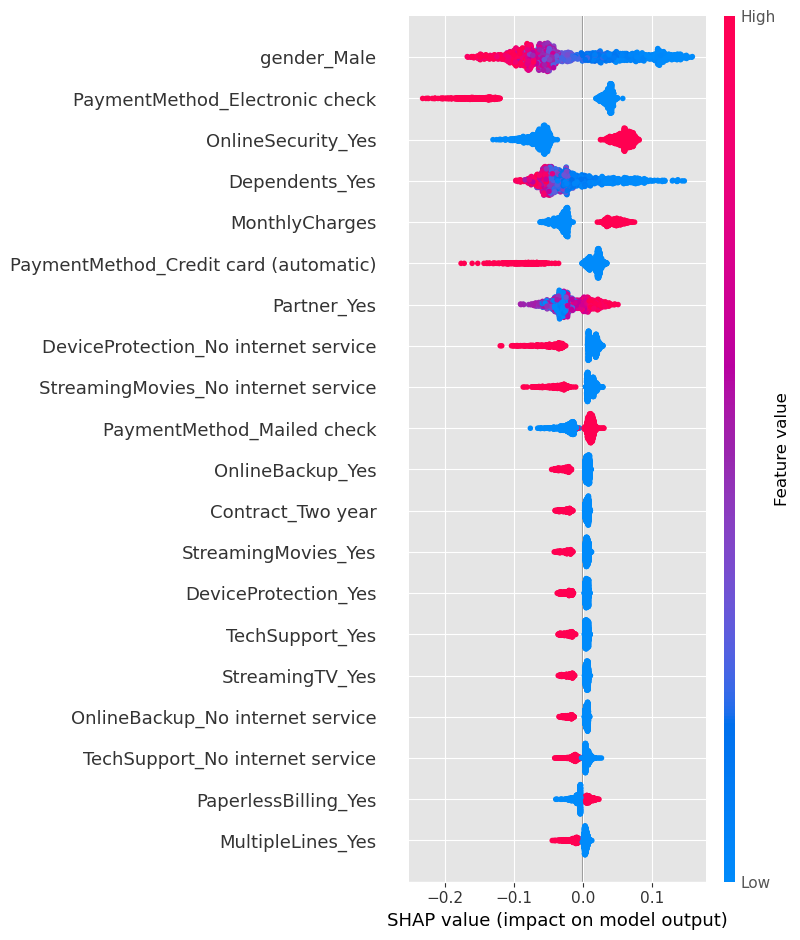

<Figure size 640x480 with 0 Axes>

In [19]:
import shap
rf_model = best_model['Random Forest']
pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', rf_model)
    ])
model = pipeline.named_steps['classifier']
pipeline.fit(X_train, y_train)

X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test)

cat_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out()
num_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['num'].feature_names_in_
all_feature_names = list(cat_feature_names) + list(num_feature_names)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=all_feature_names, index=X_test.index)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_transformed_df)

shap.summary_plot(shap_values[:, :, 1], X_test_transformed_df, plot_type="dot", show=False)
plt.show()
plt.tight_layout()

**Comment**
The shape summary plot highlights the complex and non-linear relationships between customer characteristcs and churn risk in the Telco dataset. While some features, such as gender or dependents, show relatively stable effects (e.g., being male or having dependents tends to reduce churn), other features like payement method or online security exhibit highly context-dependent behavior. For instance, using Electronic Check or subscribing to Online Security can either increase or decrease churn risk depending on the customer's overall profile. Higher monthly charges are clearly linked to a higher probability of churn. Overall, SHAP allows us to understand both global feature importance ans individual-level decision factors.